In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
mnist=tf.keras.datasets.fashion_mnist

In [3]:
(training_image,training_label),(test_image,test_label)=mnist.load_data()

In [4]:
training_image=training_image.reshape(60000,28,28,1)
training_image=training_image/255
test_image=test_image.reshape(10000,28,28,1)
test_image=test_image/255

In [10]:
model=keras.Sequential([keras.layers.Conv2D(64,(3,3),activation="relu",input_shape=(28,28,1))
                       ,keras.layers.MaxPooling2D(2,2),keras.layers.Conv2D(64,(3,3),activation="relu"),
                       keras.layers.MaxPooling2D(2,2),keras.layers.Flatten(),
                       keras.layers.Dense(128,activation="relu"),keras.layers.Dense(10,activation="softmax")
                       ])
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [13]:
model.fit(training_image,training_label,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 104s 2ms/sample - loss: 0.4456 - accuracy: 0.8369 - loss: 0.4465 - accuracy: 0. - ETA: 0s - loss: 0.446
Epoch 2/5
60000/60000 [==============================] - 92s 2ms/sample - loss: 0.2920 - accuracy: 0.8923
Epoch 3/5
60000/60000 [==============================] - 93s 2ms/sample - loss: 0.2505 - accuracy: 0.9079s - loss: 0.2505 - accura - ETA: 1s -
Epoch 4/5
60000/60000 [==============================] - 99s 2ms/sample - loss: 0.2167 - accuracy: 0.9189
Epoch 5/5
60000/60000 [==============================] - 102s 2ms/sample - loss: 0.1919 - accuracy: 0.9274


In [15]:
model.evaluate(test_image,test_label)

10000/10000 [==============================] - 5s 510us/sample - loss: 0.2738 - accuracy: 0.9048


[0.27384556992650033, 0.9048]

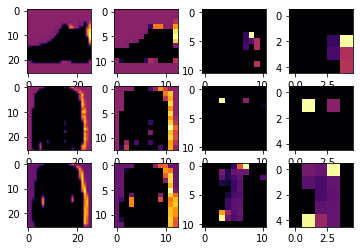

In [22]:
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
    f1 = activation_model.predict(test_image[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[0,x].grid(False)
    f2 = activation_model.predict(test_image[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1,x].grid(False)
    f3 = activation_model.predict(test_image[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2,x].grid(False)